# Lab | Comparing regression models

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

### 1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
# set customer to index to avoid having thousands of columns after encoding

data = data.set_index('Customer')

In [5]:
# encode categoricals
data = pd.get_dummies(data, drop_first=True)
data

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_California,State_Nevada,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147,0,0,...,0,0,0,0,0,0,0,1,1,0
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935,0,0,...,0,0,0,0,0,0,0,0,1,0
AI49188,12887.431650,48767,108,18,38,0,2,566.472247,0,1,...,0,0,0,0,0,0,0,1,1,0
WW63253,7645.861827,0,106,18,65,0,7,529.881344,1,0,...,0,1,0,0,0,1,0,0,1,0
HB64268,2813.692575,43836,73,12,44,0,1,138.130879,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,23405.987980,71941,73,18,89,0,2,198.234764,1,0,...,0,0,1,0,0,0,0,0,1,0
PK87824,3096.511217,21604,79,14,28,0,1,379.200000,1,0,...,1,0,0,0,0,0,0,0,1,0
TD14365,8163.890428,0,85,9,37,3,2,790.784983,1,0,...,1,0,0,0,0,0,0,0,1,0


In [6]:
y = data['Total Claim Amount']
X = data.drop(['Total Claim Amount'],axis=1)

In [9]:
numericals = X.select_dtypes(np.number)

In [10]:
transformer = StandardScaler().fit(numericals)
x_standardized = transformer.transform(numericals)

In [11]:
X = x_standardized

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


### 2. Try a simple linear regression with all the data to see whether we are getting good results.

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
predictions = model.predict(X_test)

In [15]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.7655737528323383, 94.01853739498367, 137.91169801066397)

### 3. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [60]:
# this function takes the model name (either KNN, LinearRegression or MLP), the X & y data and then optionally the range for the K value (how many neighbours) as arguments, applies the relevant model and returns a score

def model_tester(model_name, X, y, KNN_range = range(2,10)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

    if model_name == 'LinearRegression':
        model = LinearRegression()
        model.fit(X_train, y_train) 
        predictions = model.predict(X_test)
        print('R2 score =', r2_score(y_test, predictions))

    if model_name == 'KNN':
        scores = []
        for i in KNN_range:
            model = KNeighborsRegressor(n_neighbors=i)
            model.fit(X_train, y_train)
            scores.append(model.score(X_test, y_test))
        print(scores)

        plt.figure(figsize=(10,6))
        plt.plot(KNN_range,scores,color = 'blue', linestyle='dashed',
        marker='o', markerfacecolor='red', markersize=10)
        plt.title('accuracy scores vs. K Value')
        plt.xlabel('K')
        plt.ylabel('Accuracy')
    
    if model_name == 'MLP':
        model = MLPRegressor()
        model.fit(X_train, y_train)

        expected_y  = y_test
        predicted_y = model.predict(X_test)
        print('R2 score =',r2_score(expected_y, predicted_y))





### 4. Use the function to check LinearRegressor and KNeighborsRegressor.

In [37]:
# apply linear regression model

model_tester('LinearRegression', X, y)

R2 score = 0.7655737528323383


[0.30431562757365926, 0.3859327804221959, 0.403949597575332, 0.40125785335829356, 0.4079190239502454, 0.3994341642372382, 0.3931233187982712, 0.38716832820183356]


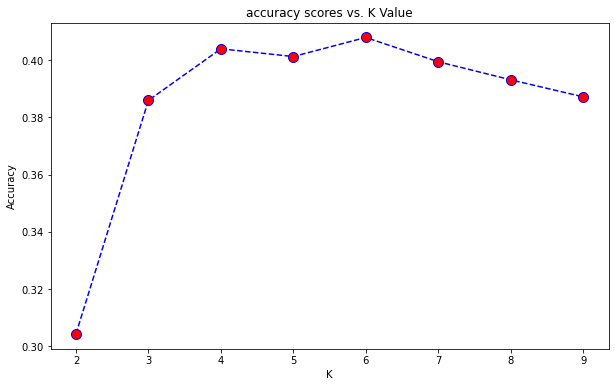

In [48]:
# apply KNN model with default range

model_tester('KNN', X, y)

[0.40125785335829356, 0.4079190239502454, 0.3994341642372382, 0.3931233187982712, 0.38716832820183356, 0.37584602367697006, 0.3665739495083017, 0.36004725585830755, 0.35444038873563266, 0.34340425074851255, 0.3341359119553444, 0.3304951128846605, 0.3277064672121808, 0.32113607725533766, 0.31663668206910167]


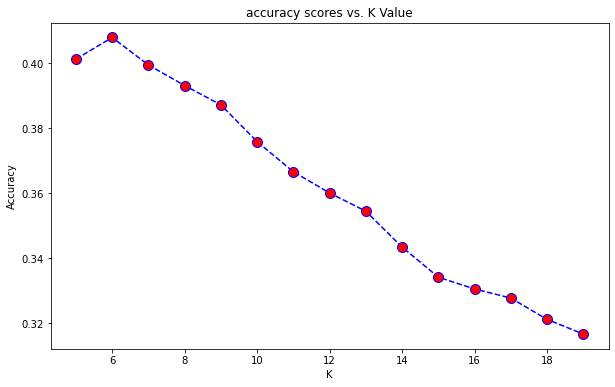

In [50]:
# apply KNN model with increased range

model_tester('KNN', X, y, KNN_range=range(5,20))

### 5. You can check also the MLPRegressor for this task!

In [61]:
model_tester('MLP',X,y)

R2 score = 0.8083026670605575


### 6. Check and discuss the results.

In [ ]:
# MLP seems the best fit with an R2 score of 0.8
# Linear regression returns an (with no data transformations except scaling) r2 score of around 0.7
# KNN seems a bad fit no matter which K value we choose - around 6 seems to get the best score of around 0.4
# as we increase the K value - the accuracy decrease